## Librerías :

In [27]:
import tensorflow as tf
from tensorflow import keras
import os
import sys
import cv2 as cv
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
%matplotlib inline

## Data Analysis:


In [121]:
classes={0:'Safe Driving'
         ,1:'texting - right'
         ,2:'talking on the phone - right'
         ,3:'texting - left'
         ,4:'talking on the phone - left'
         ,5:'operating the radio'
         ,6:'drinking'
         ,7:'reaching behind'
         ,8:'hair and makeup'
         ,9:'talking to passenger'}

In [17]:
data1 = pd.read_csv('../files/driver_imgs_list.csv')

for j in np.unique(data1["classname"]):
    print "clase :",j,"Numero de ejemplares:",np.count_nonzero(data1["classname"][data1.classname==j])

clase : c0 Numero de ejemplares: 2489
clase : c1 Numero de ejemplares: 2267
clase : c2 Numero de ejemplares: 2317
clase : c3 Numero de ejemplares: 2346
clase : c4 Numero de ejemplares: 2326
clase : c5 Numero de ejemplares: 2312
clase : c6 Numero de ejemplares: 2325
clase : c7 Numero de ejemplares: 2002
clase : c8 Numero de ejemplares: 1911
clase : c9 Numero de ejemplares: 2129


In [104]:
path_test_images='../../datasets/driver-detections/test/'
path_images='../../datasets/driver-detections/train/'
test_images_names=os.listdir(path_test_images)
print("Numero Ejemplares Test:",len(test_images_names))

('Numero Ejemplares Test:', 79726)


In [23]:
data1.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [93]:
imagen=cv.imread(path_test_images+random.choice(test_images_names))
print "Las dimensiones de cada imagen son de:",imagen.shape

Las dimensiones de cada imagen son de: (480, 640, 3)


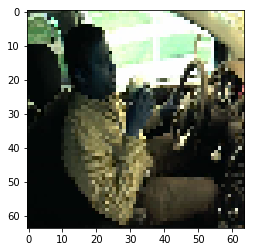

In [91]:
imagen2=cv.resize(imagen,(64,64),interpolation = cv.INTER_CUBIC)
plt.imshow(imagen2)

## Tiny Dataset Creation:

In [123]:
size=50
X_train=[]
y_train=[]
for i in np.unique(data1["classname"]):
    for j in np.random.choice(data1["img"][data1.classname==i],size):
        temp_image=cv.imread(path_images+i+"/"+j)
        X_train.append(cv.resize(temp_image,(64,64),interpolation = cv.INTER_CUBIC))
        y_train.append(int(i[-1]))
        
c = list(zip(X_train, y_train))

random.shuffle(c)

X_train,y_train = zip(*c)   


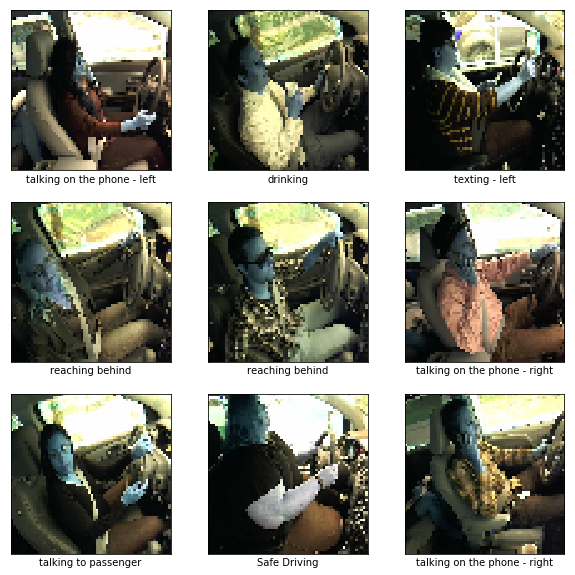

In [124]:

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(classes[y_train[i]])